# Assignment 6: Nearest Neighbour and Artificial Neural Networks

## Objective of this assignment
The objective of this exercise is to understand how k-nearest neighbor and neural networks can be used to solve classification problems.

## ** Important: ** When handing in your homework:
+ Hand in the notebook (and nothing else) named as follows: StudentName1_snumber_StudentName2_snumber.ipynb
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Blackboard.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ For problems or questions: use the BB discussion board or email the student assistants.


## Advised Reading and Exercise Material
**The following reading material is recommended:**

- Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, *Introduction to Data Mining*, section 5.2-5.4.


## Additional Tools
For this exercise you will need to load the provided *mlp.py* script.

This exercise is based upon material kindly provided by the Cognitive System Section, DTU Compute, http://cogsys.compute.dtu.dk. Any sale or commercial distribution is strictly forbidden.

## Note: you will deal with a lot of different types data in this exercise! For quick inspection and easier debugging (including when you need to ask a TA for help) use the Spyder IDE and its Variable explorer tab.

##  6.1 K-nearest neighbor classification
In this exercise we will use the k-nearest neighbors (KNN) method for classification.
First, we will consider the four synthetic data sets synth1, synth2, synth3 and
synth4 we used in earlier assignments.

#### 6.1.1 (2 points)
For each of the four synthetic data sets, do the following. Load the complete dataset `X` and examine it by making a scatter plot, coloring the points by their class in `y`. Don't forget to add a legend. Classify the data `X` using the k-nearest neighbor classifier `KNeighborsClassifier` from `sklearn.neighbors` (http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). Choose a suitable distance measure (you should consider the distance measures `euclidean` and `cityblock`). Choose a suitable number of neighbors. Make another scatterplot of the new classification (with the best k-value and distance measures you found -- just one plot per data set is fine). Create the confusion matrix, plot it using the function given below, and calculate the accuracy and error rate from these numbers.

*Hints: To generate a confusion matrix, you can use the function confusion_matrix() from the module sklearn.metrics. You can use the function plot_confusion_matrix(cm,y) below to plot the confusion matrix. Don't remember how to read a confusion matrix? Check the wiki page: https://en.wikipedia.org/wiki/Confusion_matrix*

Which distance measures worked best for each of the four problems? Can you explain why? How many neighbors were needed for the four problems? Can you give
an example of when it would be good to use a large/small number of neighbors?
Consider e.g. when clusters are well separated versus when they are overlapping.


In [6]:
import seaborn as sn
import pandas as pd
import numpy as np

def plot_confusion_matrix(cm,y):
    df_cm = pd.DataFrame(cm, index = [i+1 for i in np.unique(y)],
                  columns = [i+1 for i in np.unique(y)])
    sn.heatmap(df_cm, annot=True)
    plot.set_title('Confusion matrix of test data')
    plot.set_xlabel('Predicted class')
    plot.set_ylabel('Actual class')

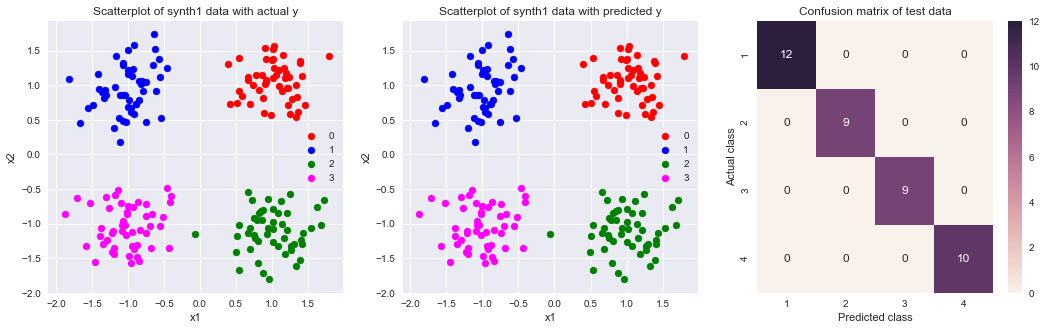

Accuracy = 100.0%
Error rate = 0.0%


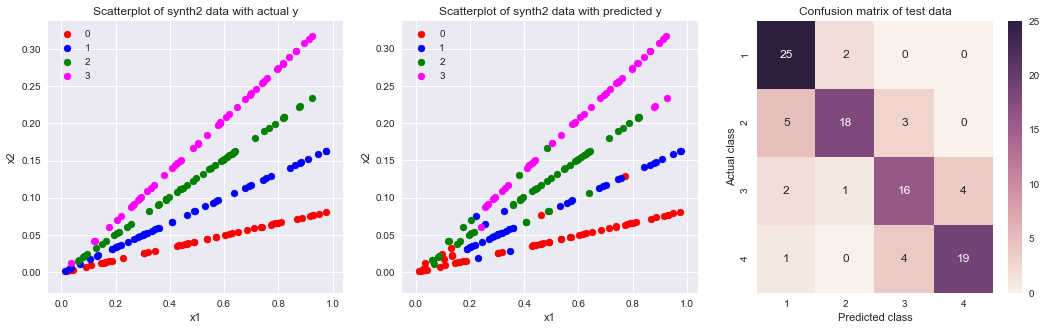

Accuracy = 78.0%
Error rate = 22.0%


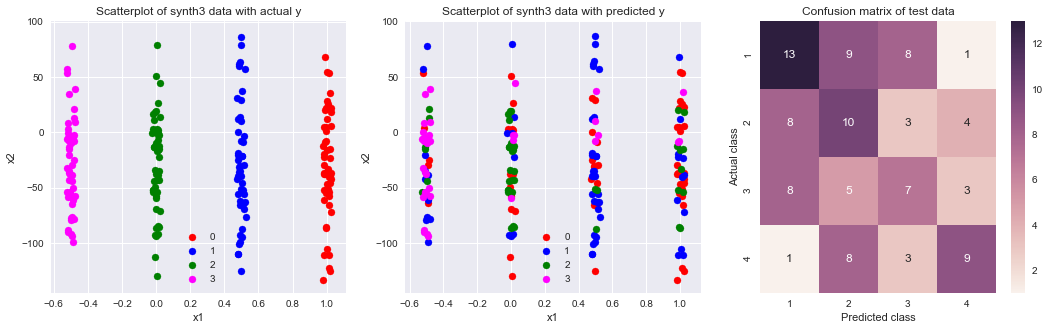

Accuracy = 39.0%
Error rate = 61.0%


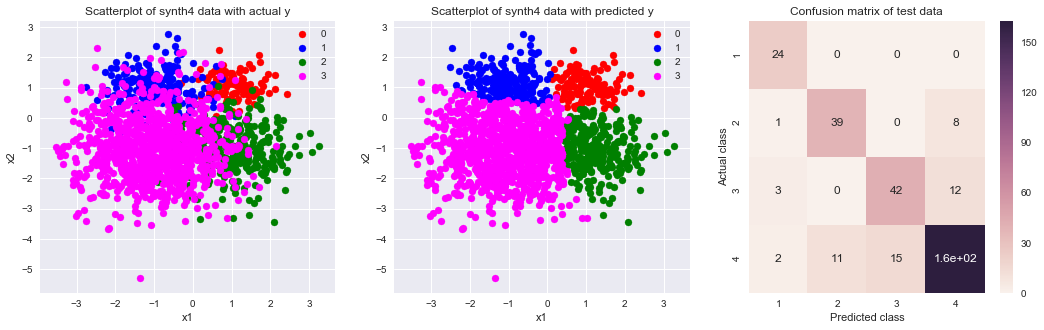

Accuracy = 83.75%
Error rate = 16.25%


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import sklearn.neighbors as nbrs
import sklearn.metrics as mtc

n_neighbours = [None, 4, 3, 3, 42]
measures = [None, 1, 1, 1, 2]

for data_set in range(1, 5):
    data = loadmat("Data/synth" + str(data_set) + ".mat")

    X = data["X"]
    X_train = data["X_train"]
    X_test = data["X_test"]
    
    y = data["y"]
    y_train = data["y_train"]
    y_test = data["y_test"]
    
    
    y_zero = [i for (i, value) in enumerate(y) if value == 0]
    y_one = [i for (i, value) in enumerate(y) if value == 1]
    y_two = [i for (i, value) in enumerate(y) if value == 2]
    y_three = [i for (i, value) in enumerate(y) if value == 3]
    
    X_zero = X[y_zero]
    X_one = X[y_one]
    X_two = X[y_two]
    X_three = X[y_three]
    
    
    fig = plt.figure(figsize = (18, 5))
    
    plot = fig.add_subplot(1, 3, 1)    
    plot.scatter(X_zero[:,0], X_zero[:,1], c = "r", label = "0")
    plot.scatter(X_one[:,0], X_one[:,1], c = "b", label = "1")
    plot.scatter(X_two[:,0], X_two[:,1], c = "g", label = "2")
    plot.scatter(X_three[:,0], X_three[:,1], c = "magenta", label = "3")
    plot.legend()
    plot.set_title("Scatterplot of synth" + str(data_set) + " data with actual y")
    plot.set_xlabel("x1")
    plot.set_ylabel("x2")
    
    
    neigh = nbrs.KNeighborsClassifier(n_neighbors = n_neighbours[data_set], p = measures[data_set])
    neigh.fit(X_train, y_train.ravel())
    
    
    y_pred = neigh.predict(X)
    y_zero = [i for (i, value) in enumerate(y_pred) if value == 0]
    y_one = [i for (i, value) in enumerate(y_pred) if value == 1]
    y_two = [i for (i, value) in enumerate(y_pred) if value == 2]
    y_three = [i for (i, value) in enumerate(y_pred) if value == 3]
    
    X_zero = X[y_zero]
    X_one = X[y_one]
    X_two = X[y_two]
    X_three = X[y_three]
    
    
    plot = fig.add_subplot(1, 3, 2)
    plot.scatter(X_zero[:,0], X_zero[:,1], c = "r", label = "0")
    plot.scatter(X_one[:,0], X_one[:,1], c = "b", label = "1")
    plot.scatter(X_two[:,0], X_two[:,1], c = "g", label = "2")
    plot.scatter(X_three[:,0], X_three[:,1], c = "magenta", label = "3")
    plot.legend()
    plot.set_title("Scatterplot of synth" + str(data_set) + " data with predicted y")
    plot.set_xlabel("x1")
    plot.set_ylabel("x2")
    

    cm = mtc.confusion_matrix(y_test, neigh.predict(X_test))

    plot = fig.add_subplot(1, 3, 3)
    plot_confusion_matrix(cm, y)
    
    
    plt.show()
    
    
    accuracy = (cm[0,0] + cm[1,1] + cm[2,2] + cm[3,3]) / float((sum(sum(cm))))    
    print("Accuracy = " + str(accuracy * 100) + "%")
    
    error_rate = 1 - accuracy
    print("Error rate = " + str(error_rate * 100) + "%")

Using the synth1, synth2 and synth3 data-sets, the manhattan distance was the measure that performed better than the euclidian distance. Using the synth4 data-set however, the euclidian distance measure was the measure that resulted in the best performance.

Using the synth1, synth2 and synth3 data-sets, a lower number of neighbours performed better. Using the synth4 data-set however, a much larger number of neighbours was needed to get the best performance.

The clusters in the first three data-sets do not overlap. Using the manhattan, or cityblock, distance is better in this situation, because it is less likely that the algorithm will find a nearest neighbour with another label using this measure. Decreasing the number of nearest neighbours has the same effect. So, a low number of nearst neighbours and the manhattan distance perform best if the data do not overlap.

The clusters in the synth4 data-set do overlap. In this case, it is best to use the euclidian distance measure and a bigger number of nearest neighbours to get a more informed decision on the to-be-assigned label of the test data-point. So when the data do overlap, the euclidian distance measure and a big number of nearest neighbours are used for the best performance.


#### 6.1.2 (1 points)
In general we can use cross-validation to select the optimal distance metric and
number of nearest neighbors k although this can be computationally expensive. We now return to the Iris data that we have considered in previous exercises, and will attempt to classify the Iris flowers using KNN. Load the Iris data into Python with the `pandas` function `read_excel()`. Inspect the data by printing the `head()`. Use the values of the 4 variables `Sepal Length,  Sepal Width,  Petal Length,  Petal Width` to create a data set `X`. Use the `Type` column to create the labels `y`. Use leave-one-out cross-validation to estimate the number of neighbors, k, for the k-nearest neighbor classifier. Plot the cross-validation average classification error as a function of k for $k = 1,..,40$.

You can use the function `LeaveOneOut` from `sklearn.model_selection`: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html

What is the optimal number of neighbors to use for this data?

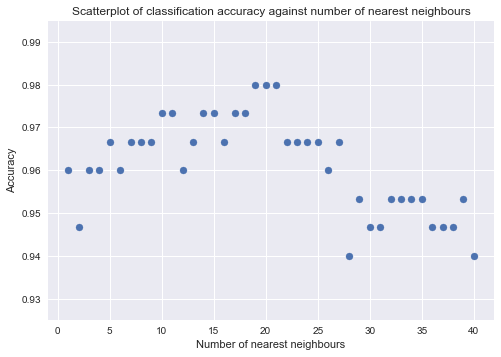

In [3]:
import sklearn.model_selection as slcn

data = pd.read_excel("Data/iris.xls")
data = np.asarray(data)
loo = slcn.LeaveOneOut()

X = data[:,:4]
y = data[:, 4]

accuracies = []

for K in range(1, 41):
    neigh = nbrs.KNeighborsClassifier(n_neighbors = K)
    accuraciesK = []
    
    for train_index, test_index in loo.split(X):
        neigh.fit(X[train_index], y[train_index].ravel())
        
        accuraciesK.append(neigh.score(X[test_index], y[test_index]))
    
    accuracies.append(np.mean(accuraciesK))
    
    
plt.scatter(range(1, 41), accuracies)
plt.title("Scatterplot of classification accuracy against number of nearest neighbours")
plt.xlabel("Number of nearest neighbours")
plt.ylabel("Accuracy")
plt.show()


The optimal number of neighbours to use for this data is 19, 20 or 21. The accuracy is highest, when the number of nearest neighbours lies in that range.


#### 6.1.3 (2 points)

KNN can also be used for regression by predicting the output of an observation
as the average of the output values of its nearest neighbors. Predict the alcohol content of wine in the `Wine` data with KNN, using the other 10 attributes as predictors (ie. 'nearest' is based on those 10 other attributes). Plot the mean squared error of the predictions compared to the actual alcohol content as a function of the number of nearest neighbors k for $k = 1,..,40$. What is the optimal value for the number of nearest neighbors?

Perform the regression on all observations; no need to do cross-validation here. 

*Hints: Use the `NearestNeighbors` class and the function `kneighbors()` to find the nearest neighbors -- check the doc and read what this function does.*
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html

*Make a matrix `X` containing the first 10 attributes, and a vector `alcohol` containing the 11th attribute. Fit `X`, and get indices of the 41 nearest neighbors from the `kneigbors()` function. Use these indices to create an Nx41 matrix containing the alcohol values of the 40 closest neigbors for each of the N wines.*

*Predict each observation as the mean of the alcohol content of its k nearest neighbors. Make sure you don't include the value for the observation itself!*

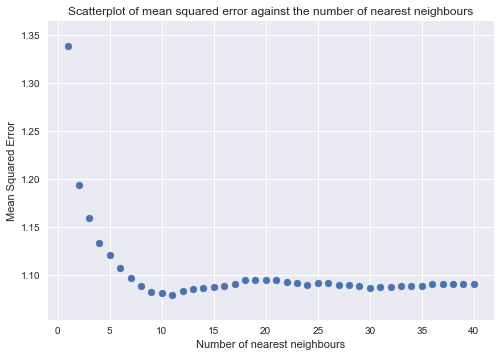

In [4]:
data = loadmat("Data/wine.mat")
X = data["X"][:,:10]
y = data["X"][:, 10]

neigh = nbrs.NearestNeighbors()
neigh.fit(X)

errors = []

for K in range(2, 42):
    
    neighbours = neigh.kneighbors(X, n_neighbors = K, return_distance = False)[:, 1:]
    alcohol = np.mean(y[neighbours], axis = 1)
    errors.append(np.mean((alcohol - y)**2))
    
plt.scatter(range(1, 41), errors)
plt.title("Scatterplot of mean squared error against the number of nearest neighbours")
plt.xlabel("Number of nearest neighbours")
plt.ylabel("Mean Squared Error")
plt.show()





The optimal value for the number of nearest neighbours is 11. The squared error is lowest when there are 11 nearest neighbours.

## 6.2 Artificial Neural Networks

In this part of the exercise we will use neural networks to classify the xor data. We will consider a network with an input layer, one layer of hidden units and an output layer. The class MLP contained in the `mlp.py` file can be used to create a Multilayer Perceptron that can learn weights that minimize $W = \{W_o,W_h\}$ the objective function $E(X,y,(W_o,W_h)) = \sum_i (f(W_o*f(W_h*X_i)) - y_i)$ for any dataset X with corresponding labels y. We use the data contained in `xor.mat` in the Data folder. 

#### 6.2.1 (0.5 points)
Check out the MLP class in the Toolbox and read the documentation well. Make sure you understand at least in general terms how the learning process works. Answer the following questions before you continue:

1. For a single layer perceptron, the activation function can be linear, e.g. $f(x) = x$. However, the activation function used in the MLP class is the sigmoid function. Why does it not make sense for an MLP to use such a linear activation function? Hint: what does the following computation simplify to if $f(x)$ is such a simple linear function: $f(Wo*f(Wh*X_i))$?
2. The function that learns the weights W mentioned above is the function `learn_weights()` which has a few optional parameters. For each of the following parameters, explain how changing the parameter might affect the learning process or the resulting solution:

> `nhidden`: This parameter sets the number of hidden units in the perceptron. Increasing the hidden units, increases the number of decision boundaries and this results in an overall better solution. This does require more computational power, though.

> `nepochs`: This parameter sets the number of steps for learning the weights. This number has to be sufficient enough for the weights to be converged, but also not too big, because this is computationally intensive.

> `eta`: The learning rate. This parameter controls the speed that the weights are learned. A too low learning rate and the weights will never converge. A too big learning rate will result in weights that will also never converge, because they will miss the target value, because they are making too big steps.

   3\. Use the following commands to create a small test set:

> `Xtest = np.array([[0,0],[0,1],[1,0],[1,1]]).`

> `ytest = np.array([0,0,0,1]).reshape(4,1)`
     
   The command `perceptron = mlp.MLP(Xtest,ytest)` will create a instance of the MLP class. Now you can learn the weights for one hidden unit by using `wh,wo,c = perceptron.learn_weights()`. What are the weights after learning? And the classification error? use the function `perceptron.plot_boundaries(wh,wo,Xtest)` to plot the data and the decision boundaries. Why does(n't) it work well with one hidden unit? Could you improve by using more?

##### NOTE: the weights are initiated randomly -- if the result looks strange, it may help to run the learning process again.

1. If a linear function is used for the activation function, the activation has range ( -$\infty$, $\infty$ ). If the sigmoid function is used, the activation has range (0, 1). Using the linear function, if there are multiple layers in the perceptron and the first layer has activation $\infty$, the second layer does not know how to deal with that. Using the sigmoid function, there is no problem because the activation will always be between 0 and 1, despite a lot of layers.



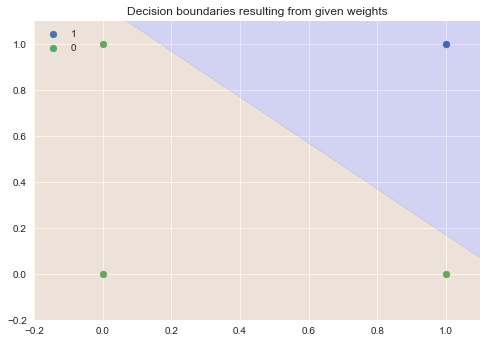

wh: [[ 4.71432666 -4.79227879 -4.792279  ]]
wo: [[-6.02111219]]
Classification error: 0.0


In [8]:
import mlp as mlp

Xtest = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
ytest = np.array([0, 0, 0, 1]).reshape(4, 1)
perceptron = mlp.MLP(Xtest, ytest)
wh, wo, c = perceptron.learn_weights(nhidden = 1, verbose = False)

perceptron.plot_boundaries(wh, wo, Xtest)

print("wh: " + str(wh))
print("wo: " + str(wo))
print("Classification error: " + str(c))


Even with one decision boundary the MLP made a classifier with an error of 0.0. One can see this data as an AND function. The AND function can be classified linearly. In other words, only one decision boundary, only one hidden unit is needed to correctly classify the input to this function.


#### 6.2.2 (0.5 points)
Load the data from `xor.mat` into Python using `scipio.io.loadmat(...)` and make a scatter plot of the two attributes in `X`, coloring the points according to the class label `y`. How are `X` and `y` related?

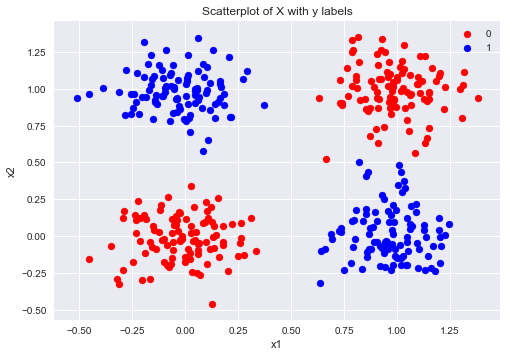

In [9]:
data = loadmat("Data/xor.mat")

X = data["X"]
y = data["y"]

y_zero = [i for (i, value) in enumerate(y) if value == 0]
y_one = [i for (i, value) in enumerate(y) if value == 1]

X_zero = X[y_zero]
X_one = X[y_one]


plt.scatter(X_zero[:,0], X_zero[:,1], c = "r", label = "0")
plt.scatter(X_one[:,0], X_one[:,1], c = "b", label = "1")
plt.legend()
plt.title("Scatterplot of X with y labels")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


If x1 and x2 are similar, the y label of 0 is assigned.
If x1 and x2 are dissimilar, for example if x1 is positive and x2 is negative, the y label of 1 is assigned.
In other words, the XOR function


You will now use the MLP class to create and learn the weights of a mlp. The constructor `mlp.MLP(X,y)` takes 2 arguments, X and y. Save the instance you created in a variable `perceptron`. The function `learn_weights()` will return the weights between the input layer and hidden layer, `W_h`, the weights between the hidden layer and the output layer, `W_o`, and the classification error  


#### 6.2.3 (2 points)
Create a MLP using X and y. Learn the weights `Wh,Wo` using 1 hidden unit. Use 10-fold cross-validation `KFold` from `sklearn.model_selection` to create training and test sets and estimate the classification error for both. Since the algorithm doesn't always converge, restart the learning process 5 times in each fold and take the best classification error.  

You can get the training error from the `learn_weights()` function. Set the optional parameter `verbose=False` to prevent cluttering the output with print statements. The test error can be obtained by feeding the test data through the network using the function `forwardprop(W_h,W_o,X=X_test)`. `forwardprop` will then return a few variables (h,o,grad_h,grad_o, and y_hat), of which the last is the output of the network. You can compare this output `y_hat` to the actual labels in `y_test`. So:

>`_,_,_,_,y_hat = perceptron.forwardprop(Wh,Wo,X=X_test)
> test_error = ... #compare y_hat to y_test`




Plot the decision boundaries of one network trained on the entire data set, again with 1 hidden unit, and explain why the network performs so well/poorly.

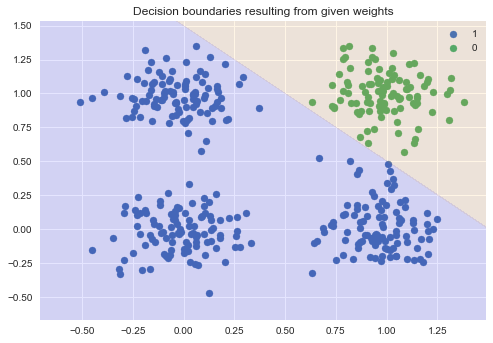

Mean training error: 0.205
Mean testing error: 0.2525


In [10]:
perceptron = mlp.MLP(X, y)
w1, w2, c = perceptron.learn_weights(nhidden = 1, verbose = False)
perceptron.plot_boundaries(w1, w2, X)

errors = [[], []]

kf = slcn.KFold(n_splits =  10)
for train_index, test_index in kf.split(X):
    X_train = X[train_index]
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    perceptron = mlp.MLP(X_train, y_train)
    
    errorsFold = [[], []]
    for i in range(5):
        Wh, Wo, c_train = perceptron.learn_weights(nhidden = 1, verbose = False)
        errorsFold[0].append(c_train)        
        
        _, _, _, _, y_hat = perceptron.forwardprop(Wh, Wo, X = X_test)
        y_hat = y_hat.T
        c_test = np.sum(y_hat != y_test) / float(len(y_test))
        errorsFold[1].append(c_test)
        
    errors[0].append(min(errorsFold[0]))
    errors[1].append(min(errorsFold[1]))
    
print("Mean training error: " + str(np.mean(errors[0])))
print("Mean testing error: " + str(np.mean(errors[1])))
    
    

With only one decision boundary, XOR cannot be classified. At least two hidden units are needed to get sufficient performance.


#### 6.2.4 
Repeat 6.2.3, but use two hidden units instead of one. Does the classification performance improve? Can you explain why?

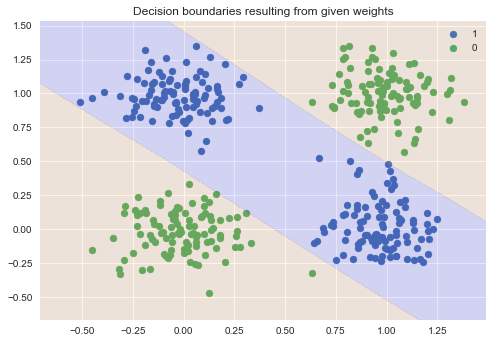

Mean training error: 0.0272222222222
Mean testing error: 0.1025


In [11]:
perceptron = mlp.MLP(X, y)
w1, w2, c = perceptron.learn_weights(nhidden = 2, verbose = False)
perceptron.plot_boundaries(w1, w2, X)

errors = [[], []]

kf = slcn.KFold(n_splits =  10)
for train_index, test_index in kf.split(X):
    X_train = X[train_index]
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    perceptron = mlp.MLP(X_train, y_train)
    
    errorsFold = [[], []]
    for i in range(5):
        Wh, Wo, c_train = perceptron.learn_weights(nhidden = 2, verbose = False)
        errorsFold[0].append(c_train)        
        
        _, _, _, _, y_hat = perceptron.forwardprop(Wh, Wo, X = X_test)
        y_hat = y_hat.T
        c_test = np.sum(y_hat != y_test) / float(len(y_test))
        errorsFold[1].append(c_test)
        
    errors[0].append(min(errorsFold[0]))
    errors[1].append(min(errorsFold[1]))
    
print("Mean training error: " + str(np.mean(errors[0])))
print("Mean testing error: " + str(np.mean(errors[1])))


The classification error does decrease, which means that the classifier performs better. With more hidden units, come more decision boundaries. With more decision boundaries comes a more complete classifier that is better. The minimum of two decision boundaries to classify the XOR function has been met, but it can still be further improved.


#### 6.2.5
Repeat 6.2.3 with 10 hidden units. What happens to the decision boundaries of the learned neural networks? What are the benefits and drawbacks of including
many hidden units in the network?

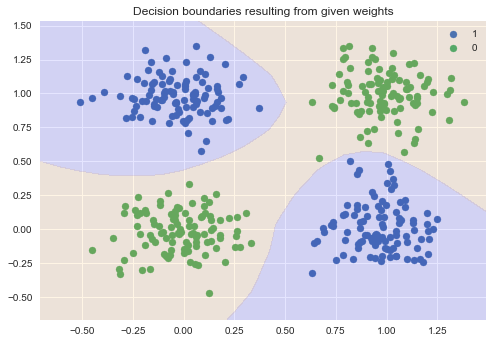

Mean training error: 0.0
Mean testing error: 0.005


In [12]:
perceptron = mlp.MLP(X, y)
w1, w2, c = perceptron.learn_weights(nhidden = 10, verbose = False)
perceptron.plot_boundaries(w1, w2, X)

errors = [[], []]

kf = slcn.KFold(n_splits =  10)
for train_index, test_index in kf.split(X):
    X_train = X[train_index]
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    perceptron = mlp.MLP(X_train, y_train)
    
    errorsFold = [[], []]
    for i in range(5):
        Wh, Wo, c_train = perceptron.learn_weights(nhidden = 10, verbose = False)
        errorsFold[0].append(c_train)        
        
        _, _, _, _, y_hat = perceptron.forwardprop(Wh, Wo, X = X_test)
        y_hat = y_hat.T
        c_test = np.sum(y_hat != y_test) / float(len(y_test))
        errorsFold[1].append(c_test)
        
    errors[0].append(min(errorsFold[0]))
    errors[1].append(min(errorsFold[1]))
    
print("Mean training error: " + str(np.mean(errors[0])))
print("Mean testing error: " + str(np.mean(errors[1])))


With 10 hidden units and thus 10 decision boundaries, the performance of the classifier is sublime. It does not classify any data-points on the training data wrong and there is a very small error on the test data. This does come at a cost. 10 hidden units is computationally very intensive to learn and the system might respond more to noise in the data with a large number of hidden units. The data has just so too much noise for the neural network to classify the input perfectly with two decision boundaries.
